<a href="https://colab.research.google.com/github/kevmanning/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/DS_133_Multiple_Regression_Assignment_Kevin_Manning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Unit 1, Sprint 3, Module 3

###Learning Objectives:
- Student can model the relationship of multple predictor variables to a single outcome.
- Student can conduct a t-test to determine the significance of individual variables in the model.
- Student can compare model fit using R-squared

#Use the following information to answer assignment questions 1 - 13.

###Is head size related to brain weight in healthy adult humans?

The Brainhead.csv dataset provides information on 237 individuals who were subject to post-mortem examination at the Middlesex Hospital in London around the turn of the 20th century. Study authors used cadavers to see if a relationship between brain weight and other more easily measured physiological characterizes such as age, sex, and head size could be determined. The end goal was to develop a way to estimate a person’s brain size while they were still alive (as the living aren’t keen on having their brains taken out and weighed). 

**We wish to determine if we can improve on our model of the linear relationship between head size and brain weight in healthy human adults.**

Source: R.J. Gladstone (1905). "A Study of the Relations of the Brain to the Size of the Head", Biometrika, Vol. 4, pp105-123.

In [ ]:
#Import the Brainhead.csv dataset from a URL and print the first few rows

import pandas as pd
import numpy as np


data_url = 'https://raw.githubusercontent.com/LambdaSchool/data-science-practice-datasets/main/unit_1/Brainhead/Brainhead.csv'

df = pd.read_csv(data_url, skipinitialspace=True, header=0)

df.head()

,Gender,Age,Head,Brain
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


From the data dictionary:

Gender: 1 = male, 2 = female

Age: 1 = younger than age 46, 2 = age 46 and older

1) Run the OLS model relating head size to brain weight (you should have done this in your project yesterday) and print your results

In [ ]:
### YOUR CODE HERE ###
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('Brain ~ Head', data= df).fit()
print(model.summary())


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:                  Brain   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     416.5
Date:                Wed, 09 Dec 2020   Prob (F-statistic):           5.96e-54
Time:                        23:00:07   Log-Likelihood:                -1350.3
No. Observations:                 237   AIC:                             2705.
Df Residuals:                     235   BIC:                             2711.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    325.5734     47.141      6.906      0.0


2) What is the adjusted $R^2$ for this model?  Explain what this value means in a complete sentence.



Answer here: The adjusted $R^2$ is 0.638<br>
$R^2$ is the % of variability in the y variable that is explained by differences in the x variable.<br> In this case, 63% of the variabiltiy in brain weight is explained by differences in head size.

The adjusted $R^2$ is 0.638, almost the same as the $R^2$.
This makes sense, because the adjusted $R^2$ penalizes you for adding more factors into your model, and increases only if the additional factors are significant. Since we didn't add in additional factors to the model (yet), we would expect $R^2$ = $R^2$ adjusted.

***I usually just write all of this stuff out to make sure that I understand it and can explain it in words.***


3) Right now age and gender are coded with 1 and 2.  Just to be safe when we run our model, we want to subtract "1" from Age and Gender so that "1" is now coded as "0" and "2" is now coded as "1".  Create two new variables in the dataframe to do this - don't overwrite the original variables.

In [ ]:
### YOUR CODE HERE ###
print(df.shape)
print(df.head(3))
print(' --- ')
print(df.tail(3))

(237, 4)
   Gender  Age  Head  Brain
0       1    1  4512   1530
1       1    1  3738   1297
2       1    1  4261   1335
 --- 
     Gender  Age  Head  Brain
234       2    2  3233   1104
235       2    2  3352   1170
236       2    2  3391   1120


In [ ]:
df['New_Gender'] = df['Gender'] - 1
df['New_Age'] = df['Age'] - 1
print(df.head(3))
print(df.tail(3))

   Gender  Age  Head  Brain  New_Gender  New_Age
0       1    1  4512   1530           0        0
1       1    1  3738   1297           0        0
2       1    1  4261   1335           0        0
     Gender  Age  Head  Brain  New_Gender  New_Age
234       2    2  3233   1104           1        1
235       2    2  3352   1170           1        1
236       2    2  3391   1120           1        1


4) Model the relationship of age group and head size to brain weight.

In [ ]:
### YOUR CODE HERE ###

model2= ols('Brain ~ Head + New_Age', data= df).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Brain   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     214.1
Date:                Wed, 09 Dec 2020   Prob (F-statistic):           1.38e-53
Time:                        23:00:07   Log-Likelihood:                -1347.8
No. Observations:                 237   AIC:                             2702.
Df Residuals:                     234   BIC:                             2712.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    347.5505     47.811      7.269      0.0

5) At the alpha = 0.05 level, is age group statistically significantly associated with brain weight after accounting for head size?  Explain your answer in at least one complete sentence.

Answer here: At alpha = 0.05, age group is statistically significant with brain weight, afte accounting for head size. The value of P for new age is 0.029, which is < 0.05, so we reject the null hypothesis, that the variables are not related.

6) At the alpha = 0.01 level, is age group statistically significantly associated with brain weight after accounting for head size?  Explain your answer in at least one complete sentence.

Answer here: At alpha = 0.01, we fail to reject the null hypothesis because the p-value for Age is 0.029, which is > 0.01.

7) What is the adjusted $R^2$ for the model relating head size and age group to brain weight?  Does adding age group to the model increase the amount of variability in brain weight explained by the model?

Answer here: the adjusted $R^2$ value is .644. Yes, this increases the amount of variability in brain weight explained by the model, but not by very much. Of course, the adjusted $R^2$ was at 63.8% with just head size, so it was already high.

This case shows that Age is significant factor at alpha= 0.05, but also, the adjusted $R^2$ doesn't really improve much. Curious about the realtionship between brain weight and age, alone

In [ ]:
model = ols('Brain ~ New_Age', data= df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Brain   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     6.946
Date:                Wed, 09 Dec 2020   Prob (F-statistic):            0.00896
Time:                        23:00:07   Log-Likelihood:                -1467.6
No. Observations:                 237   AIC:                             2939.
Df Residuals:                     235   BIC:                             2946.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1304.7364     11.332    115.136      0.0

So Age explains only 2.5% of the variability in brain weight, but the model says that at alpha= 0.05, Age is statistically significant?

8) Model the relationship of gender and head size to brain weight.

In [ ]:
### YOUR CODE HERE ###
model = ols('Brain ~ Head + New_Gender', data= df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Brain   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     211.0
Date:                Wed, 09 Dec 2020   Prob (F-statistic):           4.15e-53
Time:                        23:00:07   Log-Likelihood:                -1348.9
No. Observations:                 237   AIC:                             2704.
Df Residuals:                     234   BIC:                             2714.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    378.7139     57.299      6.609      0.0

9) At the alpha = 0.05 level, is gender statistically significantly associated with brain weight after accounting for head size?  Explain your answer in at least one complete sentence.

Answer here: at alpha= 0.05, gender is not a statistically significant predictor of brain weight because p= 0.107 > 0.05.

10) Write the linear model (insert the coefficients in the correct places) used to model the relationship between head size, age group and predicted brain weight.




In [ ]:
model = ols('Brain ~ Head + New_Age', data= df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Brain   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     214.1
Date:                Wed, 09 Dec 2020   Prob (F-statistic):           1.38e-53
Time:                        23:00:07   Log-Likelihood:                -1347.8
No. Observations:                 237   AIC:                             2702.
Df Residuals:                     234   BIC:                             2712.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    347.5505     47.811      7.269      0.0

Answer here: 

$\hat{y}$ = 347.5505 + 0.2604 x Head - 20.7316 x Age

11) Plot the relationship between head size and brain weight on a scatterplot. Use different color dots to represent older and younger individuals.

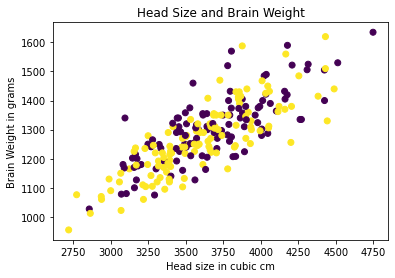

In [ ]:
### YOUR CODE HERE ###

import matplotlib.pyplot as plt

fig, ax = plt.subplots()

plt.scatter(x= df['Head'], y= df['Brain'], c= df['New_Age'])

ax.set_title('Head Size and Brain Weight')
ax.set_xlabel('Head size in cubic cm')
ax.set_ylabel('Brain Weight in grams')

plt.show()

12) Estimate the brain weight of a 60-year-old with a head size of 4000 cubic cm.

In [ ]:
### YOUR CODE HERE ###

# age= 60, so that translates to age= 1
model3= ols('Brain ~ Head + New_Age', data= df).fit()

print(model3.params[0])
print(model3.params[1])
print(model3.params[2])
print(model3.summary())

x1= 4000
x2= 1

# just so I can understand where it's coming from

intercept= model3.params[0]
slope= model3.params[1]
slope2= model3.params[2]

predicted = intercept + slope*x1 + slope2*x2
print('Predicted weight, in grams:', predicted)

347.5505005102997
0.2604387664616119
-20.731644634671426
                            OLS Regression Results                            
Dep. Variable:                  Brain   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     214.1
Date:                Wed, 09 Dec 2020   Prob (F-statistic):           1.38e-53
Time:                        23:00:08   Log-Likelihood:                -1347.8
No. Observations:                 237   AIC:                             2702.
Df Residuals:                     234   BIC:                             2712.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

Answer here: 
The predicted brain weight of a 60-year-old with a head size of 4000 cubic cm is **1368.57 grams**.

13) Estimate the brain weight of a 20-year-old with a head size of 3900 cubic cm.

In [ ]:
### YOUR CODE HERE ###

x1= 3900
x2= 0

intercept= model3.params[0]
slope= model3.params[1]
slope2= model3.params[2]

predicted = intercept + slope*x1 + slope2*x2
print('Predicted weight, in grams:', predicted)

Predicted weight, in grams: 1363.261689710586


Answer here: 
The predicted brain weight of a 20-year-old with a head size of 3900 cubic cm is **1363.26 grams**.

###Use the following information to answer questions 14 - 20


Import the Sleep.csv dataset from a URL and print the first few rows

Researchers recorded data on sleep duration as well as a set of ecological and constitutional variables  for a selection of mammal species. This data appears in the Sleep.csv dataset. 


Source: Allison, T. and Cicchetti, D. (1976), "Sleep in Mammals: Ecological and Constitutional Correlates",  Science, November 12, vol. 194, pp. 732-734.



Data Dictionary:

| Variable Name |            Description           |                                                                 Details                                                                 |              |   |
|:-------------:|:--------------------------------:|:---------------------------------------------------------------------------------------------------------------------------------------:|--------------|---|
| Animal        |            Animal name           |                                                            Character [string]                                                           |    |   |
| Body          |            Body weight           |                                                               Numeric [kg]                                                              |       |   |
| Brain         |           Brain weight           |                                                               Numeric [g]                                                               |  |   |
| SWsleep       | Slow wave (“non-dreaming”) sleep | Numeric [hours]                                                                                                                         |              |   |
| Parasleep     | Paradoxical (“dreaming”) sleep   | Numeric [hours]                                                                                                                         |              |   |
| Totsleep      | Total sleep                      | Numeric [hours]                                                                                                                         |              |   |
| Life          | Maximum life expectancy          | Numeric [years]                                                                                                                         |              |   |
| Gest          | Gestation time                   | Numeric [days]                                                                                                                          |              |   |
| Pred          | Predation index                  | Numeric [1 – 5] 1 = least likely to be preyed upon, 5 = most likely to be preyed upon                                                   |              |   |
| Exposure      | Sleep exposure index             | Numeric [1 – 5] 1 = least amount of exposure during sleep (mammal sleeps indoors or in a den), 5 = most amount of exposure during sleep |              |   |
| Danger        | Overall danger index             | Numeric [ 1 – 5] 1 = least amount of danger from other animals, 5 = most amount of danger from other animals                            |              |   |



In [ ]:
data_url = 'https://raw.githubusercontent.com/LambdaSchool/data-science-practice-datasets/main/unit_1/Sleep/Sleep.csv'

sleep = pd.read_csv(data_url, skipinitialspace=True, header=0)

sleep['Log_gest'] = np.log(sleep['Gest'])

sleep.head()

,Animal,Body,Brain,SWsleep,Parasleep,Totsleep,Life,Gest,Pred,Exposure,Danger,Log_gest
0,African_giant_pouched_rat,1.000,6.6,6.3,2.0,8.3,4.5,42.0,3,1,3,3.737670
1,Asian_elephant,2547.000,4603.0,2.1,1.8,3.9,69.0,624.0,3,5,4,6.436150
2,Baboon,10.550,179.5,9.1,0.7,9.8,27.0,180.0,4,4,4,5.192957
3,Big_brown_bat,0.023,0.3,15.8,3.9,19.7,19.0,35.0,1,1,1,3.555348
4,Brazilian_tapir,160.000,169.0,5.2,1.0,6.2,30.4,392.0,4,5,4,5.971262


14) Plot the relationship of body size to dreaming sleep and describe the shape of the relationship.

In [ ]:
### CODE HERE ###

model4= ols('Parasleep ~ Body', data= sleep).fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:              Parasleep   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.019
Method:                 Least Squares   F-statistic:                    0.2256
Date:                Wed, 09 Dec 2020   Prob (F-statistic):              0.637
Time:                        23:00:08   Log-Likelihood:                -72.766
No. Observations:                  42   AIC:                             149.5
Df Residuals:                      40   BIC:                             153.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9261      0.223      8.629      0.0

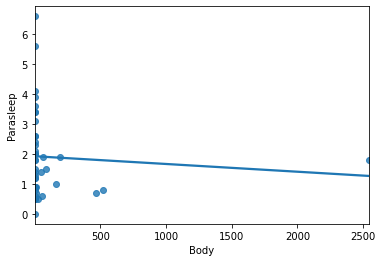

In [ ]:
import seaborn as sns
ax = sns.regplot(x= 'Body', y= 'Parasleep', data= sleep, ci= None)

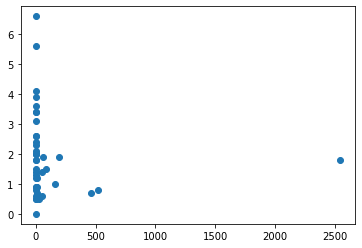

In [ ]:
fig, ax = plt.subplots()

plt.scatter(x= sleep['Body'], y= sleep['Parasleep'])
plt.show()

Answer here: There does not appear to be a linear relationship between body size and dreaming sleep. And, with a p= 0.637, at alpha= 0.05, the model summary says that we fail to reject the null hypothesis that the two variables are not associated

15) Does it appear that a log transformation would improve the model fit?  If yes, perform the log transformation and plot the resulting relationship with dreaming sleep.

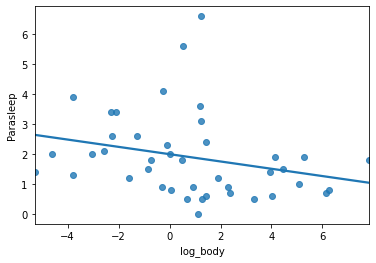

In [ ]:
### CODE HERE ###

sleep['log_body'] = np.log(sleep['Body'])
ax = sns.regplot(x= sleep['log_body'], y= sleep['Parasleep'], data= sleep, ci= None)

In [ ]:
sleep.sample(4)

,Animal,Body,Brain,SWsleep,Parasleep,Totsleep,Life,Gest,Pred,Exposure,Danger,Log_gest,log_body,log_gest
35,Rock_hyrax_(Procavia_hab),3.60,21.0,4.9,0.5,5.4,6.0,225.0,3,2,3,5.416100,1.280934,5.416100
13,Goat,27.66,115.0,3.3,0.5,3.8,20.0,148.0,5,5,5,4.997212,3.319987,4.997212
15,Gray_seal,85.00,325.0,4.7,1.5,6.2,41.0,310.0,1,3,1,5.736572,4.442651,5.736572
21,Human,62.00,1320.0,6.1,1.9,8.0,100.0,267.0,1,1,1,5.587249,4.127134,5.587249


In [ ]:
model5= ols('Parasleep ~ log_body', data= sleep).fit()
print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:              Parasleep   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     3.128
Date:                Wed, 09 Dec 2020   Prob (F-statistic):             0.0846
Time:                        23:00:09   Log-Likelihood:                -71.303
No. Observations:                  42   AIC:                             146.6
Df Residuals:                      40   BIC:                             150.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9980      0.216      9.243      0.0

Answer here: Even with the log transformation of the Body variable, it still appears that at alpha= 0.05, we fail to reject the null hypothesis that there is no association between body size and dreaming sleep

16) Run an ols model using gestation time, danger index and the log of body size.  Is the log of body size statistically significantly associated with time spent in dreaming sleep after accounting for the other two factors?

In [ ]:
### CODE HERE ###

model6= ols('Parasleep ~ Gest + C(Danger) + log_body', data= sleep).fit()
print(model6.summary())

                            OLS Regression Results                            
Dep. Variable:              Parasleep   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     4.670
Date:                Wed, 09 Dec 2020   Prob (F-statistic):            0.00138
Time:                        23:16:29   Log-Likelihood:                -60.534
No. Observations:                  42   AIC:                             135.1
Df Residuals:                      35   BIC:                             147.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.5683      0.392      9.

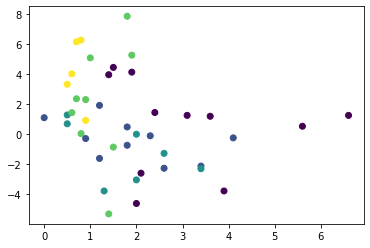

In [ ]:
fig, ax = plt.subplots()
plt.scatter(x = sleep['Parasleep'], y = sleep['log_body'], c = sleep['Danger'])

Answer here: No, the log of the body size is not statistically significant to dreaming sleep, even after accounting for gestational period and danger zone. P = .36 > .05, so we fail to reject the null hyp that there is no relationship

17) Plot the relationship of gestational time and dreaming sleep with different colors for animals who experience different amounts of sleep exposure.

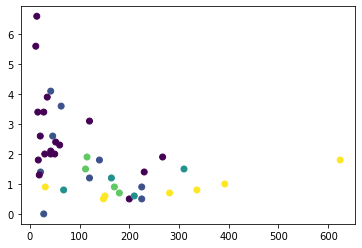

In [ ]:
### CODE HERE ###

fig, ax = plt.subplots()

plt.scatter(x= sleep['Gest'], y= sleep['Parasleep'], c= sleep['Exposure'])
plt.show()

Answer here: 



18) Run an ols model using the log of gestation time and sleep exposure index to predict the amount of time spent in dreaming sleep.  Is sleep exposure index a better predictor of amount of time spent in dreaming sleep than danger index?

In [ ]:
### CODE HERE ###

sleep['log_gest']= np.log(sleep['Gest'])

model7 = ols('Parasleep ~ log_gest + C(Exposure)', data= sleep).fit()
print(model7.summary())

                            OLS Regression Results                            
Dep. Variable:              Parasleep   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     4.583
Date:                Wed, 09 Dec 2020   Prob (F-statistic):            0.00245
Time:                        23:19:59   Log-Likelihood:                -62.540
No. Observations:                  42   AIC:                             137.1
Df Residuals:                      36   BIC:                             147.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            4.6239      0.848  

In [ ]:
model8 = ols('Parasleep ~ log_gest + C(Danger)', data= sleep).fit()
print(model8.summary())

                            OLS Regression Results                            
Dep. Variable:              Parasleep   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     9.071
Date:                Wed, 09 Dec 2020   Prob (F-statistic):           1.19e-05
Time:                        23:20:39   Log-Likelihood:                -55.763
No. Observations:                  42   AIC:                             123.5
Df Residuals:                      36   BIC:                             134.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          5.8263      0.731      7.

Answer here: 
The adjusted $R^2$ value for danger zone, given the log of gestation time, is much better than the sleep exposure index for predicting dreaming sleep.

19) Plot the relationship of gestational time and dreaming sleep with different colors for animals who experience different amounts of sleep exposure.

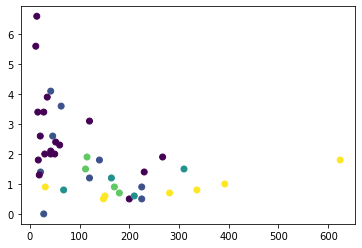

In [ ]:
### CODE HERE ###

fig, ax = plt.subplots()

plt.scatter(x= sleep['Gest'], y= sleep['Parasleep'], c= sleep['Exposure'])
plt.show()

Answer here: See #17 answer

20) Run an ols model using the log of gestation time and predation index to predict the amount of time spent in dreaming sleep.  Is predation index a better predictor of amount of time spent in dreaming sleep than danger index?

In [ ]:
### CODE HERE ###

model9 = ols('Parasleep ~ log_gest + C(Pred)', data= sleep).fit()
print(model9.summary())

                            OLS Regression Results                            
Dep. Variable:              Parasleep   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.378
Method:                 Least Squares   F-statistic:                     5.983
Date:                Wed, 09 Dec 2020   Prob (F-statistic):           0.000398
Time:                        23:33:12   Log-Likelihood:                -60.182
No. Observations:                  42   AIC:                             132.4
Df Residuals:                      36   BIC:                             142.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        5.4498      0.840      6.489   

Answer here: No, Predation index is not a better predictor than danger zone, according to the adjusted $R^2$s

#Portfolio Project Assignment

Get (and give) constructive feedback to a peer.  Swap projects with at least one other student, and give each other constructive feedback.  Make sure to tell them what you like about their project as well as any suggestions you have for imporvement.



---

